In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os
import time
import pandas as pd
import torchvision.transforms.functional as F
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import random_split
import copy
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
data_transforms = {
    'advanced': transforms.Compose([
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(),
        # transforms.
        # transforms.ColorJitter(hue=.05, saturation=.05),
        transforms.RandomRotation(90),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'basic': transforms.Compose([
        transforms.Resize((224,224)),
#         transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}



In [ ]:
df=pd.read_csv("drive/My Drive/modfinal2.csv")

def get_train_val(df,val_size=0.25):
    l=np.array(df.index)
    np.random.shuffle(l)
    val_i=int(l.shape[0]*val_size)
    return l[val_i:],l[:val_i]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
os.listdir("drive/My Drive/model_ensta2")

NotADirectoryError: ignored

In [ ]:
!unzip "drive/My Drive/Dataset_with formatted_metadata.zip"

In [ ]:
#Defining custom dataset
class Dataset(torch.utils.data.Dataset):
    
    def __init__(self,csv_file,idx,transform=None):
        self.meta_data = pd.read_csv(csv_file).iloc[idx,:].reset_index(drop=True)
        # print(self.meta_data.head())
        self.transform = transform
        self.labels=["phylum","class","species","form","sample"]
        self.label_encoder=self.get_label_encode()
        self.nclasses=self.get_nclasses()

    def __len__(self):
        return len(self.meta_data)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_path = self.meta_data.loc[idx,"img_path"]
        image = plt.imread(img_path)
        image = F.to_pil_image(image)
        labels = dict(self.meta_data.loc[idx,self.labels])

        if self.transform:
            image = self.transform(image)
                
        dict_data = {
        'image': image,
        'labels': labels
        }
        return dict_data
    
    def get_label_encode(self):
        d=dict()
        for label in self.labels:            
            le = LabelEncoder()
            self.meta_data[label]=le.fit_transform(self.meta_data[label])
            d[label]=le
        return d
    
    def get_nclasses(self):
        d=dict()
        for label in self.label_encoder:
            d[label]=len(self.label_encoder[label].classes_)
        return d

In [ ]:
torch.device("cpu")

device(type='cpu')

In [ ]:
best_model=torch.load("drive/My Drive/model_ensta2")

In [ ]:
best_model.to(torch.device("cpu"))

DNN1(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256,

In [ ]:
best_model.cpu()

DNN1(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256,

In [ ]:
ch["dataset"]["encoder"]["class"].transform(ch["dataset"]["encoder"]["class"].classes_)
# train_dataset.label_encoder["class"].transform

array([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
# torch.save(check,"drive/My Drive/checkpoint")
ch=torch.load("drive/My Drive/checkpoint")

In [ ]:
check={"transform":data_transforms,
 "dataset":{"labels":train_dataset.labels,"encoder":train_dataset.label_encoder,"nclasses":train_dataset.nclasses,"meta_data":train_dataset.meta_data},
 "parameters":best_model.cpu().state_dict()
 }

In [ ]:
class Gradcam(nn.Module):
    def __init__(self,best_model):
        super(Gradcam,self).__init__()
        self.resnet=nn.Sequential(*list(best_model.resnet.children())[:-1])
        self.avgpool=list(best_model.resnet.children())[-1]
        self.dropout=best_model.dropout            
        #building our own classifier for each label
        self.fc1=best_model.fc1
        self.classifier = best_model.classifier
        self.gradients = None

    def activations_hook(self, grad):
        self.gradients = grad
            
    def forward(self,x):
        """
        for the forward pass of the model, the input image will pass through resnet FCNN
        then it will be flattened and there will be n parallel Dense layer for each label.
        then loss function will be crossentropy which has inbuilt softmax function
        """
        x=self.resnet(x)
        print(x.shape,x.requires_grad)
        h = x.register_hook(self.activations_hook)
        x=self.avgpool(x)
        x=torch.relu(self.fc1(x.view(x.shape[0],-1)))
        x=self.dropout(x)
        y=dict()
        for label in self.classifier.keys():
            y[label]=self.classifier[label](x)
        return y

        # method for the gradient extraction
    def get_activations_gradient(self):
        return self.gradients
    
    # method for the activation exctraction
    def get_activations(self, x):
        return self.resnet(x)

In [ ]:
mo=Gradcam(best_model)
# mo

In [ ]:
# inp=data["image"][0]
# inp.requires_grad=True
# # inp.shape
# inp.shape
# inp.requires_grad
inp.

torch.Size([3, 224, 224])

In [ ]:
mo.eval()

Gradcam(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 2

In [ ]:
pred = mo(inp.unsqueeze(0).to(device))

torch.Size([1, 2048, 7, 7]) True


In [ ]:
pred["phylum"][:, 2].backward()
print(mo.get_activations_gradient())

tensor([[[[ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
          [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
          [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
          ...,
          [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
          [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005],
          [ 0.0005,  0.0005,  0.0005,  ...,  0.0005,  0.0005,  0.0005]],

         [[ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
          [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
          [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
          ...,
          [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
          [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
          [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003]],

         [[ 0.0013,  0.0013,  0.0013,  ...,  0.0013,  0.0013,  0.0013],
          [ 0.0013,  0.0013,  

In [ ]:
gradients = mo.get_activations_gradient()
pooled_gradients = torch.mean(gradients, dim=[0, 2, 3])

# get the activations of the last convolutional layer
activations = mo.get_activations(inp.unsqueeze(0).to(device)).detach()

In [ ]:
for i in range(2048):
    activations[:, i, :, :] *= pooled_gradients[i]
    

In [ ]:
heatmap = torch.mean(activations, dim=1).squeeze()

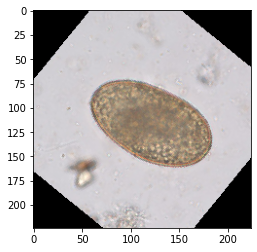

In [ ]:
imshow(data["image"][0].detach())

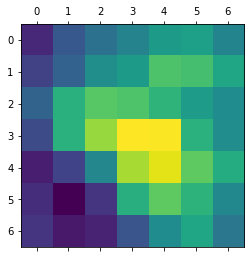

In [ ]:
heatmap = np.maximum(heatmap.cpu(), 0)

# normalize the heatmap
heatmap /= torch.max(heatmap)

# draw the heatmap
plt.matshow(heatmap.squeeze())

In [ ]:
img=inp.detach().numpy().transpose(2,1,0)

In [ ]:
import cv2
# img = cv2.imread('./Desktop/elephant.jpeg')
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
# heatmap = np.uint8(255 * heatmap)
# cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

In [ ]:
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

In [ ]:
img=img*255

In [ ]:
img=img.astype(int)

In [ ]:
img=(img-img.min())/(img.max()-img.min())

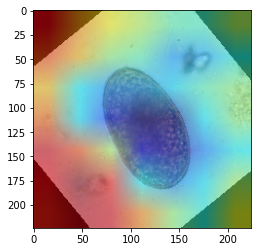

In [ ]:
superimposed_img = heatmap * 0.5 + img*0.5
plt.imshow((superimposed_img).astype(int))

In [ ]:
plt.imsave("drive/My Drive/orignal_img.jpeg",img.astype(np.uint8))
plt.imsave("drive/My Drive/superimpose.jpeg",superimposed_img.astype(np.uint8))

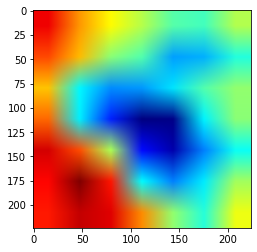

In [ ]:
plt.imshow(heatmap)
plt.imsave("heatmap.jpeg",heatmap)

In [ ]:
cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

error: ignored

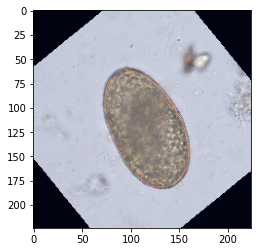

In [ ]:
plt.imshow(img)

In [ ]:
pred.

AttributeError: ignored

In [ ]:
#Since we are dealing with multi-label each with mutli-class classification
class DNN1(nn.Module):
    def __init__(self,resnet_path,nclasses,labels):
        super(DNN1, self).__init__()
        #number of multi-labels
        self.labels=labels
        #no of out_features forr each label
        self.nclasses=nclasses
        self.nmid_ft=512
        
        #Resnet model
        self.resnet=torch.load(resnet_path)
        #input channels of our classifier
        in_features = self.resnet.fc.in_features
        self.dropout=nn.Dropout(0.2)
        
        #Removing the pretrained classifier layer and freezing the weights
        self.resnet = nn.Sequential(*(list(self.resnet.children())[:-1]))
        for param in self.resnet.parameters():
            param.requires_grad = False
            
        #building our own classifier for each label
        self.fc1=nn.Linear(in_features,self.nmid_ft)
        
        
        self.classifier = nn.ModuleDict()
        for label in labels:
            self.classifier[label]=nn.Linear(self.nmid_ft,nclasses[label])
            
    def forward(self,x):
        """
        for the forward pass of the model, the input image will pass through resnet FCNN
        then it will be flattened and there will be n parallel Dense layer for each label.
        then loss function will be crossentropy which has inbuilt softmax function
        """
        x=torch.relu(self.fc1(self.resnet(x).view(x.shape[0],-1)))
        x=self.dropout(x)
        y=dict()
        for label in self.classifier.keys():
            y[label]=self.classifier[label](x)
        return y
        

In [ ]:
best_mode

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)

In [ ]:
model.resnet

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [ ]:
trainidx,validx=get_train_val(df,val_size=0.25)
train_dataset=Dataset("drive/My Drive/modfinal2.csv",idx=trainidx, transform=data_transforms["advanced"])

val_dataset=Dataset("drive/My Drive/modfinal2.csv",idx=validx, transform=data_transforms["basic"])
print(train_dataset.nclasses)
print(train_dataset.labels)
print(val_dataset.nclasses)
print(val_dataset.labels)

{'phylum': 5, 'class': 8, 'species': 19, 'form': 8, 'sample': 7}
['phylum', 'class', 'species', 'form', 'sample']
{'phylum': 5, 'class': 8, 'species': 19, 'form': 8, 'sample': 7}
['phylum', 'class', 'species', 'form', 'sample']


In [ ]:
# torch.save(train_dataset,"sd")
# s=torch.load("sd")
# a=s.label_encoder["class"]
torch.save({"dataset":train_dataset,
           "model":best_model},"drive/My Drive/enstamodel_data")

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type DNN1. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
len(train_dataset),len(val_dataset)

(312, 103)

In [ ]:
# # train_dataset, val_dataset = random_split(dataset, (int(len(dataset)*0.8), len(dataset)-int(len(dataset)*0.8)))
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32,shuffle=True,)
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=len(val_dataset),shuffle=True,)
# data=next(iter(trainloader))
# batch_img = torchvision.utils.make_grid(data["image"])
# imshow(batch_img)

In [ ]:
#appending all the loss for each label
def get_loss(out,labels,loss_fn):
    loss=0
    for label in labels:
        loss+=loss_fn(out[label],labels[label])
    return loss/len(labels)


def cal_accuracy(out,labels,batch_size,epoch_acc):
    for key in out:
        q=(out[key].detach().argmax(axis=1)==labels[key]).sum().item()/batch_size
        if not key in epoch_acc.keys():
            epoch_acc[key]=q
        else:
            epoch_acc[key]+=q
    return epoch_acc


def get_avg_acc(epoch_acc,loader):
    acc=0
    for key in epoch_acc:
        epoch_acc[key]/=len(loader)
        acc+=epoch_acc[key]
        
    return acc/len(epoch_acc),epoch_acc

def evaluate(model,loss_fn,loader):
    # print(device)
    model.eval()
    epoch_acc={}
    epoch_loss=0
    for batch in loader:
        img=batch["image"].to(device)
        labels=batch["labels"]
        for key in labels:
            labels[key]=labels[key].to(device)
        
        out=model(img)
        loss=get_loss(out,labels,loss_fn)
        epoch_loss+=loss.detach().item()
        epoch_acc=cal_accuracy(out,labels,img.shape[0],epoch_acc)
        
    avg_acc,epoch_acc=get_avg_acc(epoch_acc,loader)
    return (epoch_loss/len(loader),avg_acc,epoch_acc)


def train_model(model, loss_fn, opt,trainloader,valloader, num_epochs=1):
    since = time.time()
    best_model=""
    max_acc=-999
    train={"loss":[],"avg":[],"individual":[]}
    val={"loss":[],"avg":[],"individual":[]}
    for epoch in range(num_epochs):
        print('Epoch {} of {}'.format(epoch+1, num_epochs))
        epoch_loss=0
        epoch_acc={}
        model.train()
        # Iterate over data.
        for i,data in enumerate(trainloader):
            opt.zero_grad()
            img=data["image"].to(device)
            labels=data["labels"]
            for key in labels:
                labels[key]=labels[key].to(device)
            

            out=model(img)
            loss=get_loss(out,labels,loss_fn)
            epoch_loss+=loss.detach().item()
            loss.backward()
            opt.step()
            epoch_acc=cal_accuracy(out,labels,img.shape[0],epoch_acc)
            
        val_result=evaluate(model,loss_fn,valloader)
        avg_acc,epoch_acc=get_avg_acc(epoch_acc,trainloader)
        avg_loss=epoch_loss/len(trainloader)
        print('Train')
        print(f"Loss: {avg_loss}\nAccuracy: Each_label_acc->{epoch_acc}\n\tAvg acc->{avg_acc}\n")
        print("Validation")
        print(f"Loss: {val_result[0]}\nAccuracy: Each_label_acc->{val_result[2]}\n\tAvg acc->{val_result[1]}")
        print("-"*50)
        
        train["avg"].append(avg_acc)
        train["individual"].append(epoch_acc)
        train["loss"].append(avg_loss)
        
        val["avg"].append(val_result[1])
        val["individual"].append(val_result[2])
        val["loss"].append(val_result[0])
        if val_result[1]>max_acc:
            max_acc=val_result[1]
            best_model=copy.deepcopy(model)

        
       

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    return train,val,best_model,max_acc
# train,val=train_model(model, loss_fn, optimizer,trainloader,valloader,num_epochs=2)

In [ ]:
model=DNN1("drive/My Drive/resnet", train_dataset.nclasses, train_dataset.labels,).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:657: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [ ]:
train,val,best_model,best_acc=train_model(model, loss_fn, optimizer,trainloader,valloader,num_epochs=100)

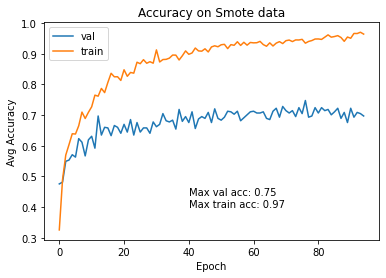

In [ ]:
plt.plot(list(range(len(val["avg"][:-5]))),val["avg"][:-5])
plt.plot(list(range(len(train["avg"][:-5]))),train["avg"][:-5])
plt.title("Accuracy plot")
plt.xlabel("Epoch")
plt.ylabel("Avg Accuracy")
plt.legend(["val","train"])
m=max(val["avg"])
t=max(train["avg"])
plt.annotate(f"Max val acc: {m:0.2f}\nMax train acc: {t:0.2f}",(40,0.4))
# plt.annotate(f"Max train acc: {t:0.2f}",(30,0.0))
plt.savefig("Accuracy plot.jpg")

In [ ]:
from collections import Counter

def get_attrs(out,labels):
    o=torch.ones((len(labels),len(labels["phylum"])))
    l=torch.ones((len(labels),len(labels["phylum"])))
    for i,key in enumerate(labels):
        o[i]=out[key].cpu().argmax(axis=1)
        l[i]=labels[key]
        
    return dict(Counter((o==l).sum(axis=0).numpy()))
# Counter(((l==o).sum(axis=0)))


def cal_accuracy(out,labels,batch_size,epoch_acc):
    for key in out:
        q=(out[key].detach().argmax(axis=1)==labels[key]).sum().item()/batch_size
        if not key in epoch_acc.keys():
            epoch_acc[key]=q
        else:
            epoch_acc[key]+=q
    return epoch_acc
    


def get_avg_acc(epoch_acc,loader):
    acc=0
    for key in epoch_acc:
        epoch_acc[key]/=len(loader)
        acc+=epoch_acc[key]
        
    return acc/len(epoch_acc),epoch_acc

def get_report(out,labels):
    c=0
    rep=""
    for key in labels:
        if c==0:
            c+=1
            r=classification_report(labels[key].cpu(),out[key].cpu().argmax(axis=1),target_names=val_dataset.label_encoder[key].classes_,output_dict=True)
            rep=pd.DataFrame(r).transpose()
            rep=rep.append(pd.Series(dtype=str,name=key)).append(pd.Series(dtype=str,name="")).append(pd.Series(dtype=str,name=""))
        else:
            r=classification_report(labels[key].cpu(),out[key].cpu().argmax(axis=1),target_names=val_dataset.label_encoder[key].classes_,output_dict=True)
            r=pd.DataFrame(r).transpose()
            rep=rep.append(r).append(pd.Series(dtype=str,name=key)).append(pd.Series(dtype=str,name="")).append(pd.Series(dtype=str,name=""))
    return rep
# report(out,labe)

def evaluate_test(model,loss_fn,loader):
    # print(device)
    model.eval()
    epoch_acc={}
    # epoch_loss=0

    for batch in loader:
        img=batch["image"].to(device)
        labels=batch["labels"]
        for key in labels:
            labels[key]=labels[key].to(device)
        
        out=model(img)
        epoch_acc=cal_accuracy(out,labels,img.shape[0],epoch_acc)
        report=get_report(out,labels)
        attrbs=get_attrs(out,labels)
        
    avg_acc,epoch_acc=get_avg_acc(epoch_acc,loader)
    return (avg_acc,epoch_acc,attrbs),report

r,report=evaluate_test(best_model,loss_fn=loss_fn,loader=valloader)

In [ ]:
len(val_dataset),len(train_dataset)

(103, 312)

In [ ]:
r

(0.8116504854368932,
 {'class': 0.8640776699029126,
  'form': 0.7572815533980582,
  'phylum': 0.8737864077669902,
  'sample': 0.8932038834951457,
  'species': 0.6699029126213593},
 {0: 4, 1: 6, 2: 4, 3: 10, 4: 21, 5: 58})

In [ ]:
val=0
for i in r[-1]:
    val+=r[-1][i]

res={}
for i in r[-1]:
    res[i]=r[-1][i]/val*100

In [ ]:
res

{0: 3.8834951456310676,
 1: 5.825242718446602,
 2: 3.8834951456310676,
 3: 9.70873786407767,
 4: 20.388349514563107,
 5: 56.310679611650485}

In [ ]:
report.to_excel("report2.xlsx")
report


,precision,recall,f1-score,support
Amoebozoa,0.583333,1.000000,0.736842,7.0
Apicomplexa,0.980000,0.980000,0.980000,50.0
Nematoda,0.838710,0.896552,0.866667,29.0
Platyhelminthes,0.714286,0.500000,0.588235,10.0
Sarcomastigophora,1.000000,0.428571,0.600000,7.0
...,...,...,...,...
macro avg,0.818197,0.848074,0.828015,103.0
weighted avg,0.896521,0.893204,0.893254,103.0
sample,NaN,NaN,NaN,NaN
,NaN,NaN,NaN,NaN


In [ ]:
torch.save(best_model, "drive/My Drive/model_ensta2")

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type DNN1. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
for col in c.columns[1:7]:
    print(c[col].value_counts())
    print(c[col].nunique())
    print("---------------------------------------")
    print()

Apicomplexa          195
Nematoda             114
Platyhelminthes       52
Sarcomastigophora     27
Amoebozoa             27
Name: phylum, dtype: int64
5
---------------------------------------

Aconoidasida     139
Chromadorea       96
Conoidasida       56
Cestoda           41
Tubulinea         27
Zooflagellate     27
Enoplea           18
Tapeworms         11
Name: class, dtype: int64
8
---------------------------------------

Plasmodium           139
Cyclospora            30
Ascaris               29
Entamoeba             27
Giardia               27
Dibothriocephalus     21
Hymenolepis           20
Trichuris             18
Enterobius            18
Ancylostoma           17
Toxocara              17
Cryptosporidium       16
Strongyloides         15
Echinococcus          11
Sarcocystis           10
Name: genus, dtype: int64
15
---------------------------------------

Plasmodium falciparum        36
Plasmodium vivax             31
Cyclospora cayetanensis      30
Plasmodium malariae        

In [ ]:
df.form=df.form.replace({"decorticated egg":"egg"})

In [ ]:
df=df[df.form!="na"].reset_index(drop=True)

In [ ]:
# Toxoplasma gondii             9
# B. coli                       9
# Trichinella sp.               7
# Hymenolepis diminuta          6
# Clonorchis sinensis           6
# Taenia solium                 6

In [ ]:
df.species=df.species.replace({"Hymenolepis diminuta":"Hymenolepis spp",
                    "Hymenolepis nana":"Hymenolepis spp",
                    "Taenia solium":"na",
                    "Clonorchis sinensis":"na",
                    "Trichinella sp.":"na",
                    "B. coli":"na",
                    "Toxoplasma gondii":"na",
                    })

In [ ]:
c=df[df.species!="na"]

In [ ]:
c.reset_index(drop=True,inplace=True)

In [ ]:
c

,Unnamed: 0,phylum,class,genus,species,form,sample,image_name,image_url,img_path
0,0,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,egg,intestinal tissue,Evermicularis_worm4_HB.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_worm4_HB.jpg
1,1,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,egg,intestinal tissue,Evermicularis_egg_HBa.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_egg_HBa.jpg
2,2,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,egg,intestinal tissue,Evermicularis_egg_wtmt.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_egg_wtmt.jpg
3,3,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,egg,intestinal tissue,Evermicularis_SC_egg.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_SC_egg.jpg
4,4,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,egg,intestinal tissue,Evermicularis_egg_UVa.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_egg_UVa.jpg
...,...,...,...,...,...,...,...,...,...,...
410,502,Platyhelminthes,Tapeworms,Echinococcus,Echinococcus granulosus,cyst,liver,EchinococcusCellNetix_C.jpg,https://www.cdc.gov//dpdx/echinococcosis/image...,./Dataset/Echinococcus/EchinococcusCellNetix_C...
411,503,Platyhelminthes,Tapeworms,Echinococcus,Echinococcus granulosus,cyst,liver,EchinococcusCellNetix_D.jpg,https://www.cdc.gov//dpdx/echinococcosis/image...,./Dataset/Echinococcus/EchinococcusCellNetix_D...
412,504,Platyhelminthes,Tapeworms,Echinococcus,Echinococcus granulosus,cyst,liver,EchinococcusCellNetix_E.jpg,https://www.cdc.gov//dpdx/echinococcosis/image...,./Dataset/Echinococcus/EchinococcusCellNetix_E...
413,505,Platyhelminthes,Tapeworms,Echinococcus,Echinococcus granulosus,cyst,liver,EchinococcusCellNetix_F.jpg,https://www.cdc.gov//dpdx/echinococcosis/image...,./Dataset/Echinococcus/EchinococcusCellNetix_F...


In [ ]:
c.to_csv("drive/My Drive/modfinal2.csv")